## More Experiments on DBpedia Films (3000 instances of type dbo:Film)

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dirname = "./iswc/N10000/"
statisticsFile = pd.read_csv(dirname + 'combined_statistics.txt',sep='\t', skiprows = 1)

#only considering cases in paper excluding pruned strategies
statisticsFile = statisticsFile[statisticsFile['Case'] <= 10] 
statisticsFile = statisticsFile[statisticsFile['Case'] != 8]
statisticsFile = statisticsFile.sort_values(by = ['Case','Depth'], ascending=[1, 1])
new_index = np.arange(len(statisticsFile))
statisticsFile = statisticsFile.set_index(new_index)

labels = ["NRSE","NRSE'","UE","UEP","NRST","NRST'","$R2V_{PR}$","$R2V_{Freq}$","$R2V$","$R2V_{Sp}$","$NRSE_{Sp}$","NRSE'-Sp","$UE_{Sp}$","$UEP_{Sp}$","$NRST_{Sp}$","NRST'-Sp","$UET_{Sp}$","$UETP_{Sp}$"]
styles = ['b--', 'r--', 'g--', 'y--','c--','m--','k--','b-', 'r-', 'g-', 'y-','c-','m-','k-']
markers = ['o', '^', 'v', 's','+','x','D','o', '^', 'v', 's','+','x','D']

#print(statisticsFile)

                                                File  Case  Depth  BN  Min  \
0  20180508_1213_case_7_entities_3000_qlimit500_e...     7      1   1    1   
1  20180508_1213_case_7_entities_3000_qlimit500_e...     7      2   1    1   
2  20180508_1213_case_7_entities_3000_qlimit500_e...     7      3   1    1   
3  20180509_0211_case_9_entities_3000_qlimit500_e...     9      1   1    3   
4  20180509_0211_case_9_entities_3000_qlimit500_e...     9      2   1    1   
5  20180509_0211_case_9_entities_3000_qlimit500_e...     9      3   1    1   
6  20180509_0211_case_10_entities_3000_qlimit500_...    10      1   1    3   
7  20180509_0211_case_10_entities_3000_qlimit500_...    10      2   1    0   
8  20180509_0211_case_10_entities_3000_qlimit500_...    10      3   1    0   

    Max  AvgQResults      AvgTok  TotalTime     AvgQT  Zero  allTokensPre  \
0     1    15.944000    0.999333     15.851  0.126597     2        146494   
1     1    90.830667    0.955667     16.870  0.139561   133      

## Presenting different metrics for indirectly measuring the size of the collected subgraphs  using specifity-based random walk schemes $R2V_{Sp}$, $R2V$, and $R2V_{PR}$.

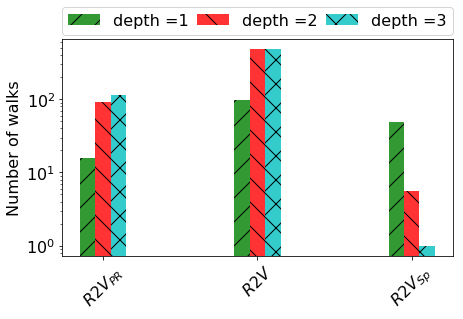

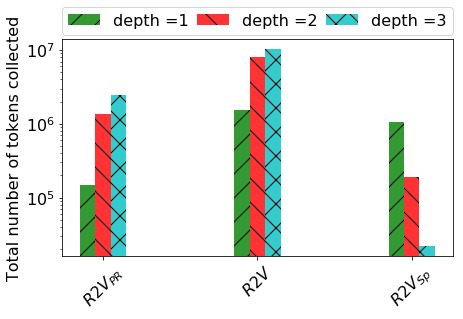

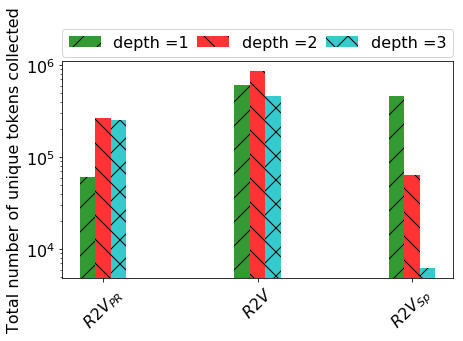

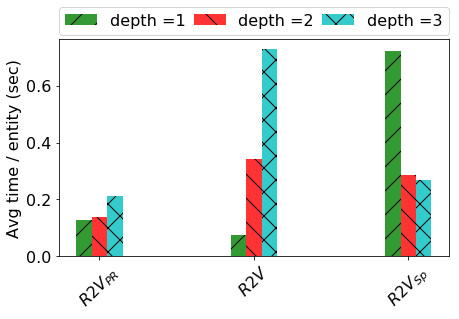

In [15]:
import datetime
import matplotlib

cases = np.sort(np.unique(statisticsFile['Case'].tolist()))
depths = np.sort(np.unique(statisticsFile['Depth'].tolist()))

plotWidth = 7
plotHeight = 4
barstyles = ['g', 'r', 'c', 'y']
patterns = ('/', '\\', 'x', '//', '+','x','.', 'o', 'O', '.')
bar_width = 0.1
opacity = 0.8
depths2 = list(depths)

font = {'family' : 'sans-serif',
        'weight' : 'medium',
        'size'   : 16}
matplotlib.rc('font', **font)

fig, ax = plt.subplots(figsize=(plotWidth,plotHeight))
plt.yscale('log')

for depth in depths:

    dataslice = statisticsFile[statisticsFile['Depth'] == depth]
    casesX = dataslice['Case'].tolist()
    labelsX = [labels[i-1] for i in casesX]
    tokensY = dataslice['AvgQResults'].tolist()
    intlabelcases = np.arange(1,len(casesX)+1)
    plt.bar(intlabelcases + (depths2.index(depth)-1)*bar_width, tokensY, bar_width,
                 alpha=opacity,
                 color=barstyles[depth-1], hatch=patterns[depth-1],
                 label="depth =" + str(depth), bottom = 0)

    
plt.ylabel('Number of walks')
plt.legend(loc = 3, bbox_to_anchor=(0., 1.02, 1., .102), #fontsize = 'small',
               ncol=3, mode="expand", borderaxespad=0.)
plt.xticks(intlabelcases, labelsX, rotation=45)
#plt.savefig(dirname + 'results/avg_num_walks_movies.pdf', format='pdf', dpi=600, bbox_inches='tight')
plt.show()

fig, ax = plt.subplots(figsize=(plotWidth,plotHeight))
plt.yscale('log')

for depth in depths:

    dataslice = statisticsFile[statisticsFile['Depth'] == depth]
    casesX = dataslice['Case'].tolist()
    labelsX = [labels[i-1] for i in casesX]
    tokensY = dataslice['allTokensPre'].tolist()
    intlabelcases = np.arange(1,len(casesX)+1)
    plt.bar(intlabelcases + (depths2.index(depth)-1)*bar_width, tokensY, bar_width,
                 alpha=opacity,
                 color=barstyles[depth-1], hatch=patterns[depth-1],
                 label="depth =" + str(depth), bottom = 0)

    
plt.ylabel('Total number of tokens collected')
plt.legend(loc = 3, bbox_to_anchor=(0., 1.02, 1., .102), #fontsize = 'small',
               ncol=3, mode="expand", borderaxespad=0.)
plt.xticks(intlabelcases, labelsX, rotation=45)
#plt.savefig(dirname + 'results/avg_num_walks_movies.pdf', format='pdf', dpi=600, bbox_inches='tight')
plt.show()

fig, ax = plt.subplots(figsize=(plotWidth,plotHeight))
plt.yscale('log')
for depth in depths:

    dataslice = statisticsFile[statisticsFile['Depth'] == depth]
    casesX = dataslice['Case'].tolist()
    labelsX = [labels[i-1] for i in casesX]
    tokensY = dataslice['uniqueTokensPre'].tolist()
    intlabelcases = np.arange(1,len(casesX)+1)
    plt.bar(intlabelcases + (depths2.index(depth)-1)*bar_width, tokensY, bar_width,
                 alpha=opacity,
                 color=barstyles[depth-1], hatch=patterns[depth-1],
                 label="depth =" + str(depth), bottom = 0)

    
plt.ylabel('Total number of unique tokens collected')
plt.legend(loc = 3, bbox_to_anchor=(0., 1.02, 1., .102), #fontsize = 'small',
               ncol=3, mode="expand", borderaxespad=0.)
plt.xticks(intlabelcases, labelsX, rotation=45)
#plt.savefig(dirname + 'results/avg_num_walks_movies.pdf', format='pdf', dpi=600, bbox_inches='tight')
plt.show()

fig, ax = plt.subplots(figsize=(plotWidth,plotHeight))
#plt.yscale('log')
for depth in depths:
    dataslice = statisticsFile[statisticsFile['Depth'] == depth]

    casesX = dataslice['Case'].tolist()
    labelsX = [labels[i-1] for i in casesX]
    tokensY = dataslice['AvgQT'].tolist()
    intlabelcases = np.arange(1,len(casesX)+1)
    plt.bar(intlabelcases + (depths2.index(depth)-1)*bar_width, tokensY, bar_width,
                 alpha=opacity,
                 color=barstyles[depth-1], hatch=patterns[depth-1],
                 label="depth =" + str(depth), bottom = 0)

plt.ylabel('Avg time / entity (sec)')
plt.legend(loc = 3, bbox_to_anchor=(0., 1.02, 1., .102), #fontsize = 'small',
           ncol=3, mode="expand", borderaxespad=0.)
plt.xticks(intlabelcases, labelsX, rotation=45)
#plt.savefig(dirname + 'results/avg_querytime_movies' + '.pdf', format='pdf', dpi=600, bbox_inches='tight')
plt.show()

The major takeaway from above plots is that fewer information is extracted from the RDF graph with $R2V_{Sp}$ as compared to $R2V$, and yet precision and accuracy results are either better or comparable, meaning more relevant information characterize entities is being extracted using specificity based random walks. $R2V_{PR}$ collects fewer results because PR values are not available for literals, therefore, data properties are not considered.

## Separately plotting precision and recall for entity similarity using specifity-based random walk schemes  $R2V_{Sp}$,  $R2V$, and $R2V_{PR}$.

Plotting Batman
k@[5]


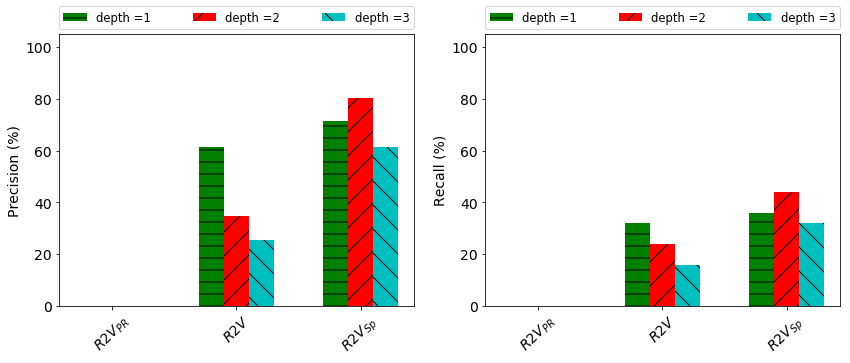

Plotting Lord of the Rings
k@[3]


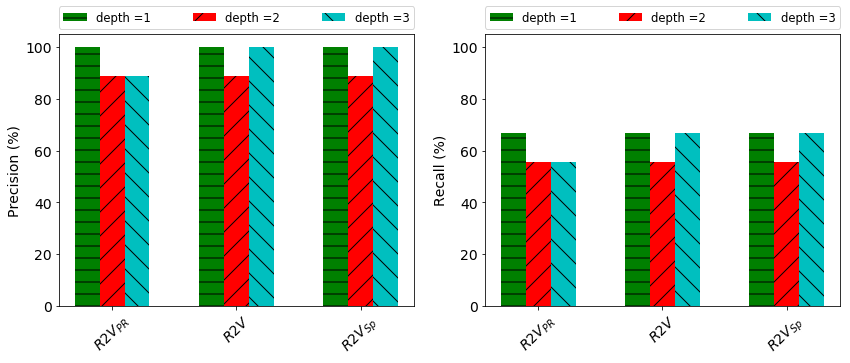

Plotting Star Wars
k@[5]


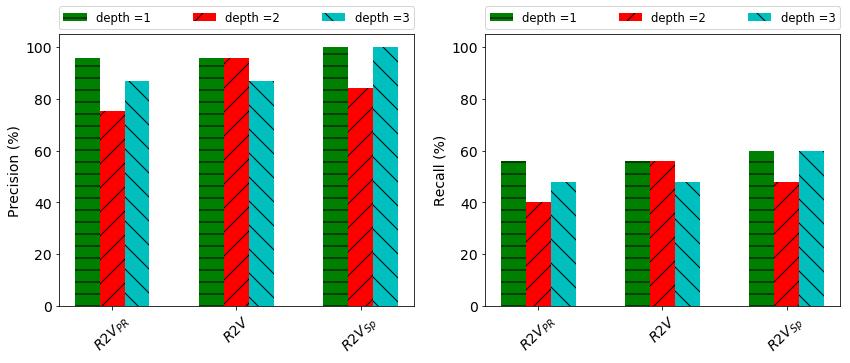

Plotting Superman
k@[4]


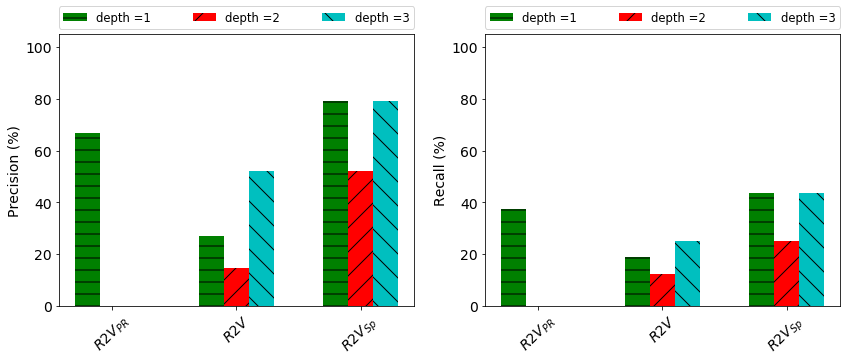

Plotting Spiderman
k@[2]


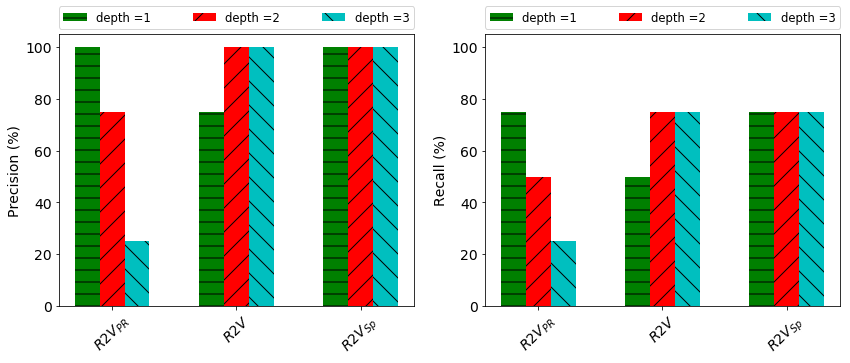

Plotting Star Trek
k@[9]


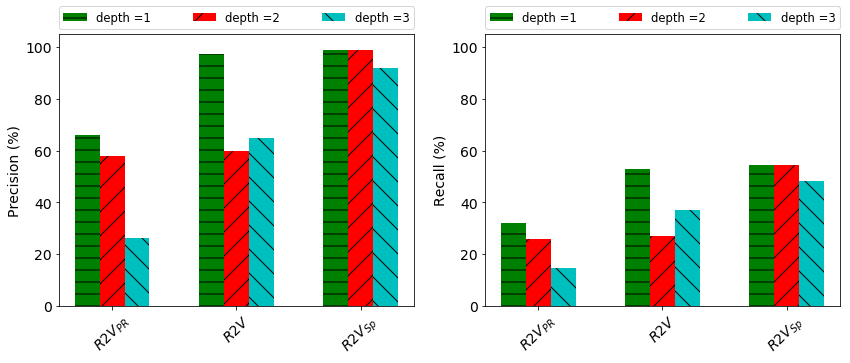

Plotting Indiana Jones
k@[3]


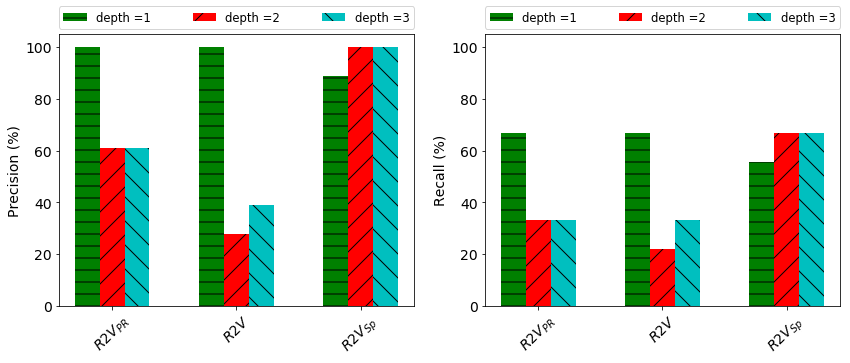

Plotting Back to the Future
k@[3]


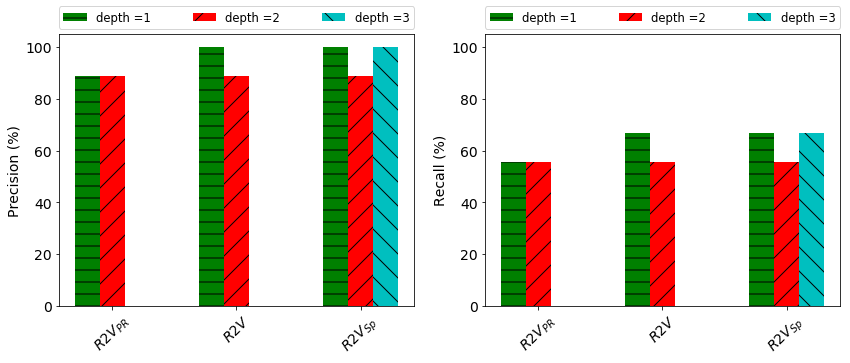

Plotting Harry Potter
k@[5]


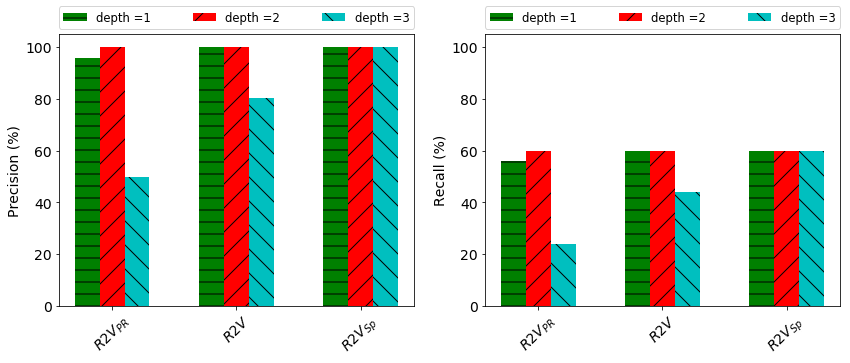

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib


styles = ['b--', 'r--', 'g--', 'y--','c--','m--','k--','b-', 'r-', 'g-', 'y-','c-','m-','k-','b:', 'r:', 'g:', 'y:','c:','m:','k:']
markers = ['o', '^', 'v', 's','+','x','D','o', '^', 'v', 's','+','x','D','o', '^', 'v', 's','+','x','D']

depths2 = list([1,2,3])
plotWidth = 14
plotHeight = 5

barstyles = ['g', 'r', 'c', 'y']
patterns = ('-', '/', '\\', 'x', '\\', '*', 'o', 'O', '.')

cases = (7,9,10)#,11,13,15,17)
labelsX = [labels[i-1] for i in cases]

font = {'family' : 'sans-serif',
        'weight' : 'medium',
        'size'   : 14}
matplotlib.rc('font', **font)
    
#outputDir = dirname + 'results/'
#movies = ('batman', 'lotr', 'starwars', 'spiderman', 'startrek','indiana','bttf','harry','godzilla')

movies = ('batman', 'lotr', 'starwars', 'superman', 'spiderman', 'startrek','indiana','bttf','harry')
movieLabels = ('Batman', 'Lord of the Rings', 'Star Wars', 'Superman', 'Spiderman', 'Star Trek','Indiana Jones'
               ,'Back to the Future','Harry Potter')

for i in np.arange(0,len(movies)):

    movie = movies[i]
    print('Plotting ' + movieLabels[i])
    resultsFile = open(dirname + 'results/' + movie + '_20180509-1236_avg.txt', 'r')

    datalist = []

    for line in resultsFile:
        line = line.rstrip('\n')
        words = line.split('\t')
        scheme = words[0]
        currcase = int(scheme[scheme.index('case_')+5:scheme.index('_d')])
        k = int(words[1])
        precision = float(words[2])
        recall = float(words[3])
        if (precision == 0 and recall == 0):
            fscore = 0.0
        else:
            fscore = 2*(precision*recall)/(precision+recall)
        if currcase not in cases:
            continue
        datalist.append([scheme, currcase, k, precision, recall, fscore])

    sortedData = sorted(datalist, key=lambda result:result[1])

    kvals = np.sort(np.unique([s[2] for s in sortedData]))
    kvals = [np.max(kvals)]
    print('k@' + str(kvals))
    
    fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(plotWidth,plotHeight))
    
    for k in np.arange(0,len(kvals)):
        plt.subplot(1,2,1)#, figsize=(plotWidth,plotHeight))
        bar_width = 0.2
        opacity = 1.0
        idx = 0
        for depth in depths2:
            data = [s for s in sortedData if ("d_" + str(depth)) in s[0] and s[2] == kvals[k]]
            YP = [y[3] for y in data]
            intlabelcases = np.arange(1,len(cases)+1)
            plt.bar(-0.2 + intlabelcases + (depths2.index(depth))*bar_width, YP, bar_width,
                     alpha=opacity,
                     color=barstyles[depth-1], hatch=patterns[depth-1],
                     label="depth =" + str(depth))
            idx = idx + 1

    plt.ylim(0.0, 105.0)
    plt.ylabel('Precision (%)')
    plt.legend(loc = 3, bbox_to_anchor=(0., 1.02, 1., .102), fontsize = 'small',
               ncol=3, mode="expand", borderaxespad=0.)
    plt.xticks(intlabelcases, labelsX, rotation=45)
        #fig.tight_layout()
    #plt.savefig(outputDir + movie + '_' + str(kvals[k]) + '_precision.pdf', format='pdf', dpi=600, bbox_inches='tight')
    
    for k in np.arange(0,len(kvals)):    
        plt.subplot(1,2,2)
        bar_width = 0.2
        opacity = 1.0
        idx = 0
        for depth in depths2:
            data = [s for s in sortedData if ("d_" + str(depth)) in s[0] and s[2] == kvals[k]]
            YP = [y[4] for y in data]
            intlabelcases = np.arange(1,len(cases)+1)
            plt.bar(-0.2 + intlabelcases + (depths2.index(depth))*bar_width, YP, bar_width,
                     alpha=opacity,
                     color=barstyles[depth-1], hatch=patterns[depth-1],
                     label="depth =" + str(depth))
            idx = idx + 1

    plt.ylim(0.0, 105.0)
    plt.ylabel('Recall (%)')
    plt.legend(loc = 3, bbox_to_anchor=(0., 1.02, 1., .102), fontsize = 'small',
               ncol=3, mode="expand", borderaxespad=0.)
    plt.xticks(intlabelcases, labelsX, rotation=45)
        
    #fig.savefig(outputDir + movie + '_' + str(kvals[k]) + '_results.pdf', format='pdf', dpi=600, bbox_inches='tight')
    #fig.tight_layout()
    plt.show()
    #close(fig)


## Effect of collecting too fewer walks

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dirname = "./iswc/50_walks/"
statisticsFile = pd.read_csv(dirname + '20180511_1031_entities_3000_qlimit50_statistics.txt',sep='\t', skiprows = 1)

#only considering cases in paper excluding pruned strategies
#statisticsFile = statisticsFile[statisticsFile['Case'] <= 10] 
#statisticsFile = statisticsFile[statisticsFile['Case'] != 8]
statisticsFile = statisticsFile.sort_values(by = ['Case','Depth'], ascending=[1, 1])
new_index = np.arange(len(statisticsFile))
statisticsFile = statisticsFile.set_index(new_index)

labels = ["NRSE","NRSE'","UE","UEP","NRST","NRST'","$R2V_{PR}$","$R2V_{Freq}$","$R2V$","$R2V_{Sp}$","$NRSE_{Sp}$","NRSE'-Sp","$UE_{Sp}$","$UEP_{Sp}$","$NRST_{Sp}$","NRST'-Sp","$UET_{Sp}$","$UETP_{Sp}$"]
styles = ['b--', 'r--', 'g--', 'y--','c--','m--','k--','b-', 'r-', 'g-', 'y-','c-','m-','k-']
markers = ['o', '^', 'v', 's','+','x','D','o', '^', 'v', 's','+','x','D']

print(statisticsFile.head())

                                                File  Case  Depth  BN  Min  \
0  C:/Users/rizwan/Work/VirtuosoWalks/DBpedia/Wal...     7      1   1    1   
1  C:/Users/rizwan/Work/VirtuosoWalks/DBpedia/Wal...     7      2   1    1   
2  C:/Users/rizwan/Work/VirtuosoWalks/DBpedia/Wal...     7      3   1    1   
3  C:/Users/rizwan/Work/VirtuosoWalks/DBpedia/Wal...     9      1   1    1   
4  C:/Users/rizwan/Work/VirtuosoWalks/DBpedia/Wal...     9      2   1    1   

   Max  AvgQResults      AvgTok  TotalTime     AvgQT  Zero  
0    1    15.935333    0.999333     14.786  0.117637     2  
1    1    41.449333    0.955667     12.280  0.100596   133  
2    1    40.736000    0.922000     16.291  0.136837   234  
3  882    49.887333  138.969333      7.444  0.059277     2  
4   88    49.964000    1.455333     18.203  0.145467     2  


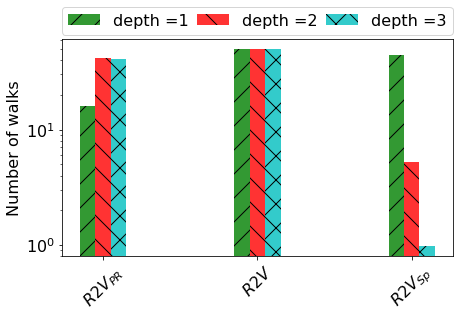

In [37]:
import datetime
import matplotlib

cases = np.sort(np.unique(statisticsFile['Case'].tolist()))
depths = np.sort(np.unique(statisticsFile['Depth'].tolist()))
dirname = "./iswc/50_walks/"
plotWidth = 7
plotHeight = 4
barstyles = ['g', 'r', 'c', 'y']
patterns = ('/', '\\', 'x', '//', '+','x','.', 'o', 'O', '.')
bar_width = 0.1
opacity = 0.8
depths2 = list(depths)

font = {'family' : 'sans-serif',
        'weight' : 'medium',
        'size'   : 16}
matplotlib.rc('font', **font)

fig, ax = plt.subplots(figsize=(plotWidth,plotHeight))
plt.yscale('log')

for depth in depths:

    dataslice = statisticsFile[statisticsFile['Depth'] == depth]
    casesX = dataslice['Case'].tolist()
    labelsX = [labels[i-1] for i in casesX]
    tokensY = dataslice['AvgQResults'].tolist()
    intlabelcases = np.arange(1,len(casesX)+1)
    plt.bar(intlabelcases + (depths2.index(depth)-1)*bar_width, tokensY, bar_width,
                 alpha=opacity,
                 color=barstyles[depth-1], hatch=patterns[depth-1],
                 label="depth =" + str(depth), bottom = 0)

    
plt.ylabel('Number of walks')
plt.legend(loc = 3, bbox_to_anchor=(0., 1.02, 1., .102), #fontsize = 'small',
               ncol=3, mode="expand", borderaxespad=0.)
plt.xticks(intlabelcases, labelsX, rotation=45)
#plt.savefig(dirname + 'results/avg_num_walks_movies.pdf', format='pdf', dpi=600, bbox_inches='tight')
plt.show()



## Separately plotting precision and recall for entity similarity using specifity-based random walk schemes  $R2V_{Sp}$,  $R2V$, and $R2V_{PR}$.

Plotting Batman
k@[5]


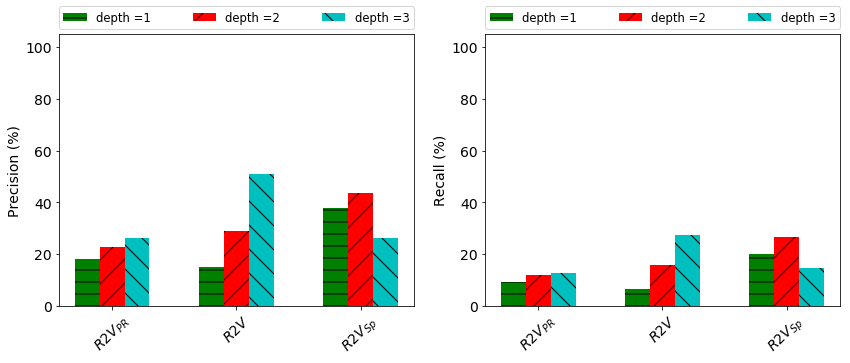

Plotting Lord of the Rings
k@[3]


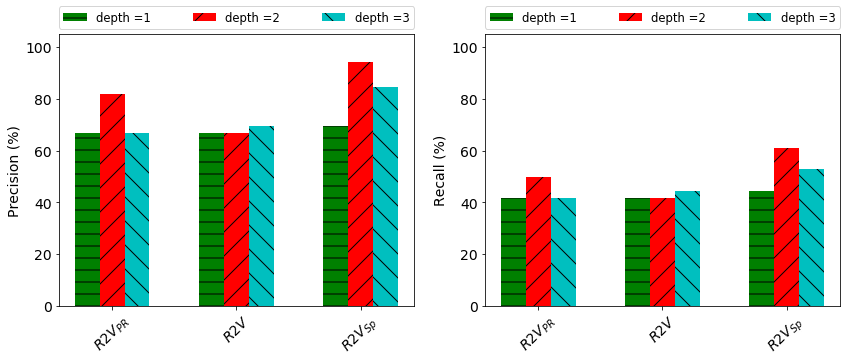

Plotting Star Wars
k@[5]


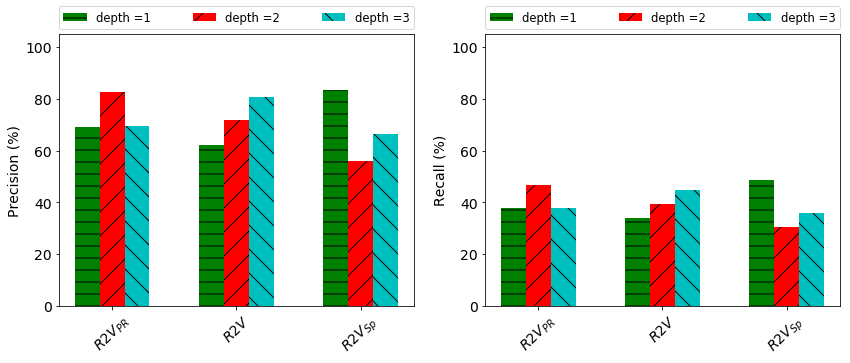

Plotting Spiderman
k@[2]


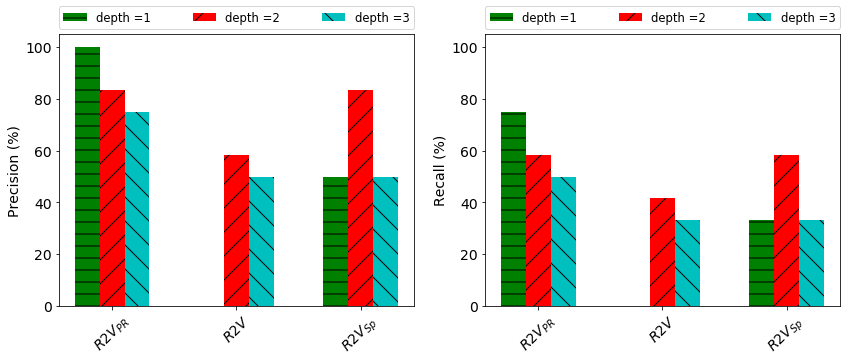

Plotting Star Trek
k@[9]


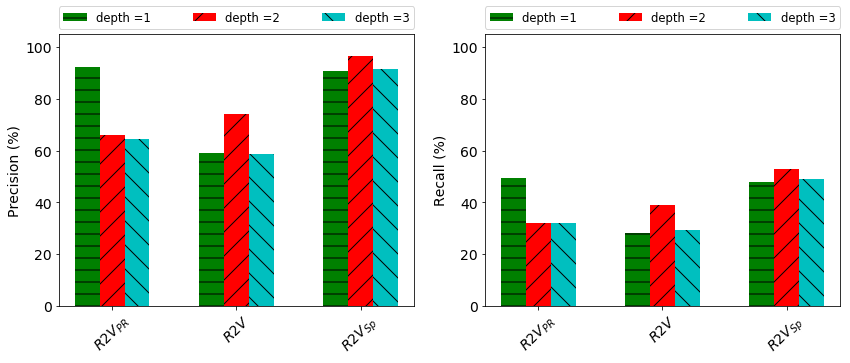

Plotting Indiana Jones
k@[3]


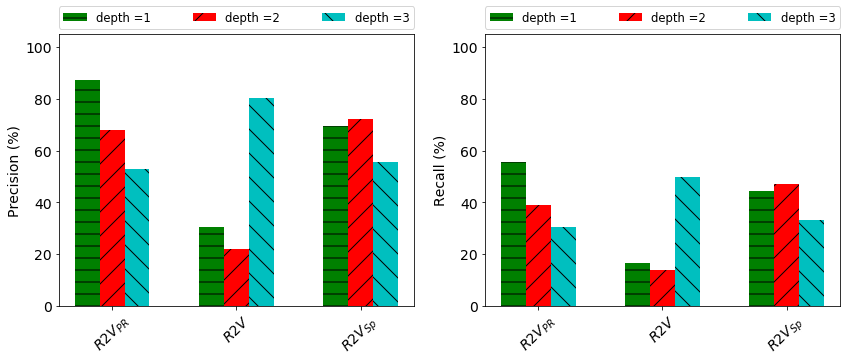

Plotting Back to the Future
k@[3]


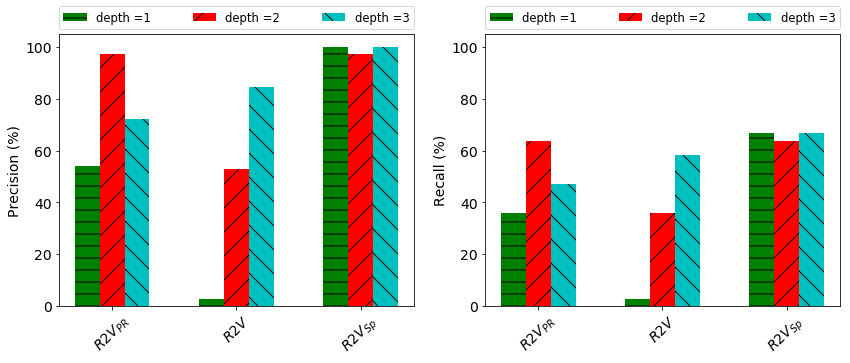

Plotting Harry Potter
k@[5]


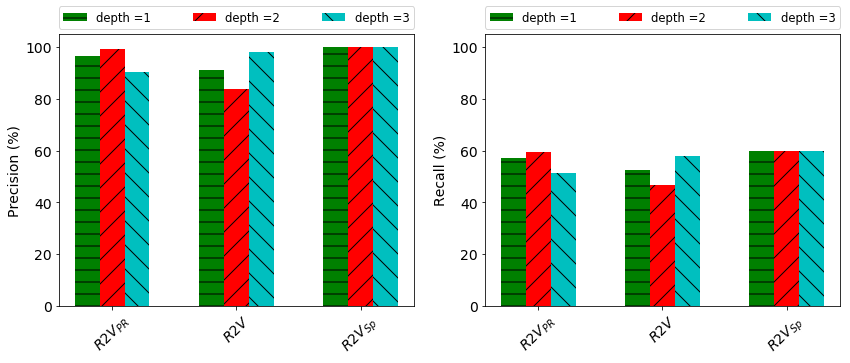

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib


styles = ['b--', 'r--', 'g--', 'y--','c--','m--','k--','b-', 'r-', 'g-', 'y-','c-','m-','k-','b:', 'r:', 'g:', 'y:','c:','m:','k:']
markers = ['o', '^', 'v', 's','+','x','D','o', '^', 'v', 's','+','x','D','o', '^', 'v', 's','+','x','D']

depths2 = list([1,2,3])
plotWidth = 14
plotHeight = 5

barstyles = ['g', 'r', 'c', 'y']
patterns = ('-', '/', '\\', 'x', '\\', '*', 'o', 'O', '.')

cases = (7,9,10)#,11,13,15,17)
labelsX = [labels[i-1] for i in cases]

font = {'family' : 'sans-serif',
        'weight' : 'medium',
        'size'   : 14}
matplotlib.rc('font', **font)
    
#outputDir = dirname + 'results/'
#movies = ('batman', 'lotr', 'starwars', 'spiderman', 'startrek','indiana','bttf','harry','godzilla')

movies = ('batman', 'lotr', 'starwars', 'startrek','indiana','bttf','harry')
movieLabels = ('Batman', 'Lord of the Rings', 'Star Wars', 'Spiderman', 'Star Trek','Indiana Jones'
               ,'Back to the Future','Harry Potter')

for i in np.arange(0,len(movies)):

    movie = movies[i]
    print('Plotting ' + movieLabels[i])
    #resultsFile = open(dirname + 'results/' + movie + '_20180511-1050_avg.txt', 'r')
    resultsFile = open(dirname + 'results/franchise_' + movie + '_20180511-1251_avg.txt', 'r')

    datalist = []

    for line in resultsFile:
        line = line.rstrip('\n')
        words = line.split('\t')
        scheme = words[0]
        currcase = int(scheme[scheme.index('case_')+5:scheme.index('_d')])
        k = int(words[1])
        precision = float(words[2])
        recall = float(words[3])
        if (precision == 0 and recall == 0):
            fscore = 0.0
        else:
            fscore = 2*(precision*recall)/(precision+recall)
        if currcase not in cases:
            continue
        datalist.append([scheme, currcase, k, precision, recall, fscore])

    sortedData = sorted(datalist, key=lambda result:result[1])

    kvals = np.sort(np.unique([s[2] for s in sortedData]))
    kvals = [np.max(kvals)]
    print('k@' + str(kvals))
    
    fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(plotWidth,plotHeight))
    
    for k in np.arange(0,len(kvals)):
        plt.subplot(1,2,1)#, figsize=(plotWidth,plotHeight))
        bar_width = 0.2
        opacity = 1.0
        idx = 0
        for depth in depths2:
            data = [s for s in sortedData if ("d_" + str(depth)) in s[0] and s[2] == kvals[k]]
            YP = [y[3] for y in data]
            intlabelcases = np.arange(1,len(cases)+1)
            plt.bar(-0.2 + intlabelcases + (depths2.index(depth))*bar_width, YP, bar_width,
                     alpha=opacity,
                     color=barstyles[depth-1], hatch=patterns[depth-1],
                     label="depth =" + str(depth))
            idx = idx + 1

    plt.ylim(0.0, 105.0)
    plt.ylabel('Precision (%)')
    plt.legend(loc = 3, bbox_to_anchor=(0., 1.02, 1., .102), fontsize = 'small',
               ncol=3, mode="expand", borderaxespad=0.)
    plt.xticks(intlabelcases, labelsX, rotation=45)
        #fig.tight_layout()
    #plt.savefig(outputDir + movie + '_' + str(kvals[k]) + '_precision.pdf', format='pdf', dpi=600, bbox_inches='tight')
    
    for k in np.arange(0,len(kvals)):    
        plt.subplot(1,2,2)
        bar_width = 0.2
        opacity = 1.0
        idx = 0
        for depth in depths2:
            data = [s for s in sortedData if ("d_" + str(depth)) in s[0] and s[2] == kvals[k]]
            YP = [y[4] for y in data]
            intlabelcases = np.arange(1,len(cases)+1)
            plt.bar(-0.2 + intlabelcases + (depths2.index(depth))*bar_width, YP, bar_width,
                     alpha=opacity,
                     color=barstyles[depth-1], hatch=patterns[depth-1],
                     label="depth =" + str(depth))
            idx = idx + 1

    plt.ylim(0.0, 105.0)
    plt.ylabel('Recall (%)')
    plt.legend(loc = 3, bbox_to_anchor=(0., 1.02, 1., .102), fontsize = 'small',
               ncol=3, mode="expand", borderaxespad=0.)
    plt.xticks(intlabelcases, labelsX, rotation=45)
        
    #fig.savefig(outputDir + movie + '_' + str(kvals[k]) + '_results.pdf', format='pdf', dpi=600, bbox_inches='tight')
    #fig.tight_layout()
    plt.show()
    #close(fig)


## Separately plotting precision and recall for entity similarity for entire franchise using specifity-based random walk schemes  $R2V_{Sp}$,  $R2V$, and $R2V_{PR}$.
### We make predicition based on each movie in the franchise, as opposed to the convention of using only the first one in the series 

Plotting batman
k@[5]


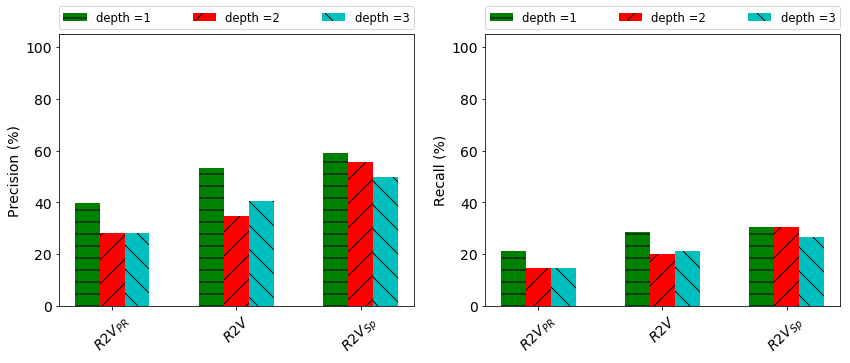

Plotting bttf
k@[3]


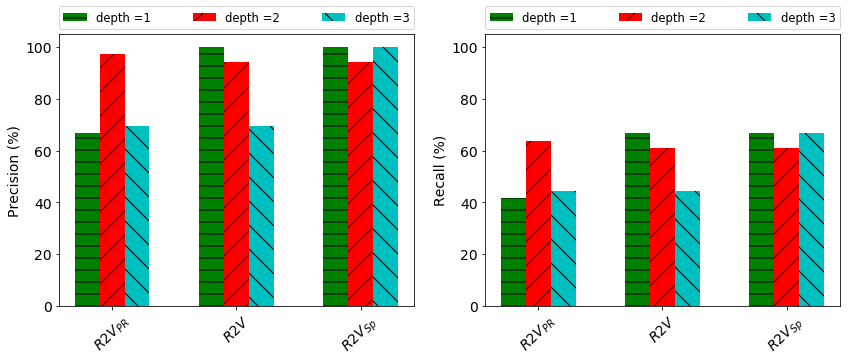

Plotting godzilla
k@[22]


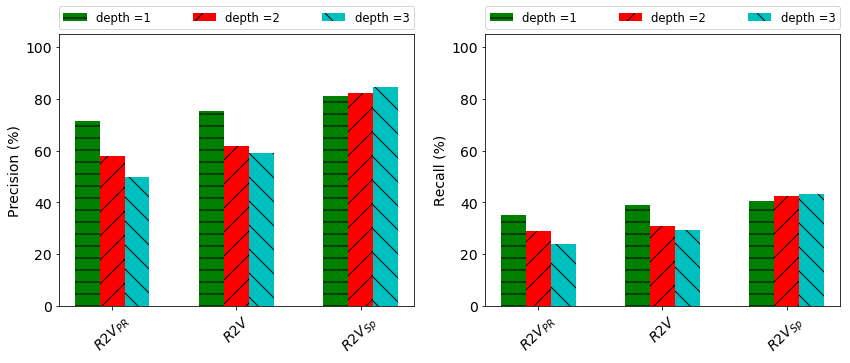

Plotting harry
k@[5]


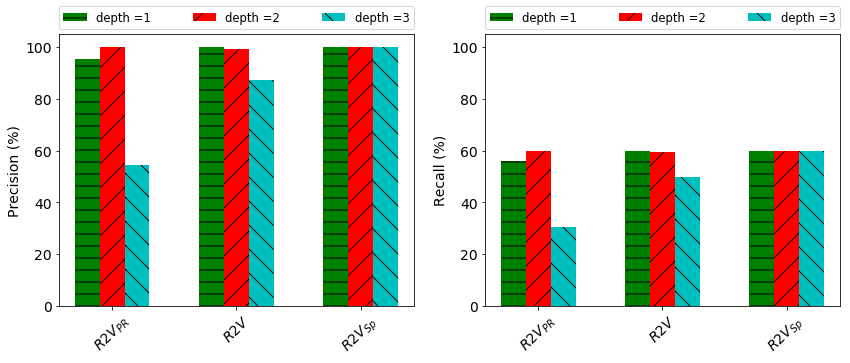

Plotting indiana
k@[3]


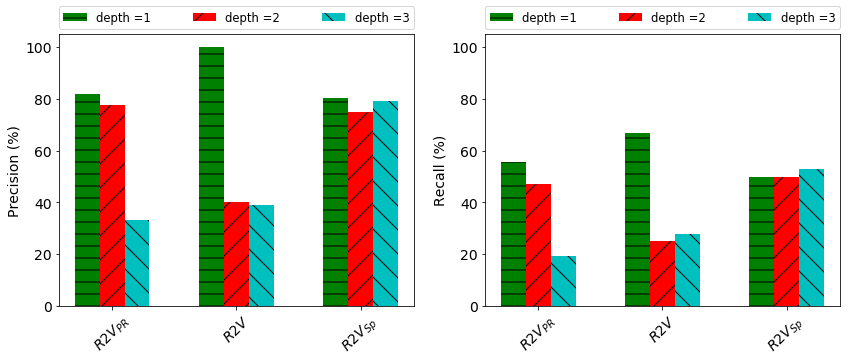

Plotting lotr
k@[3]


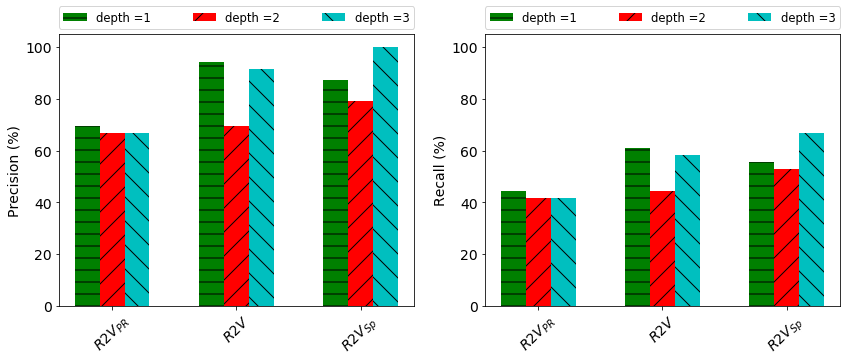

Plotting starwars
k@[5]


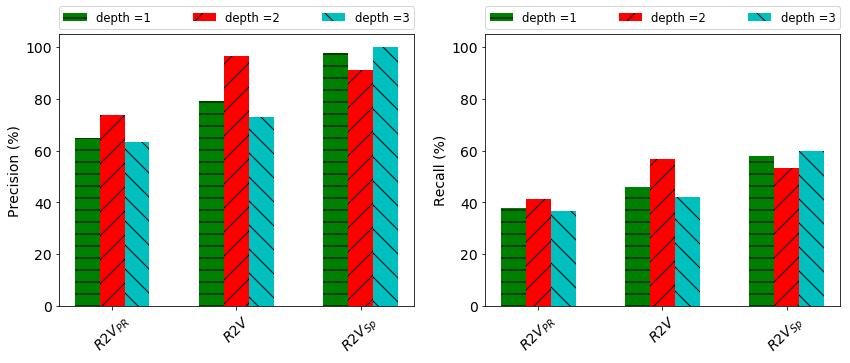

Plotting spiderman
k@[2]


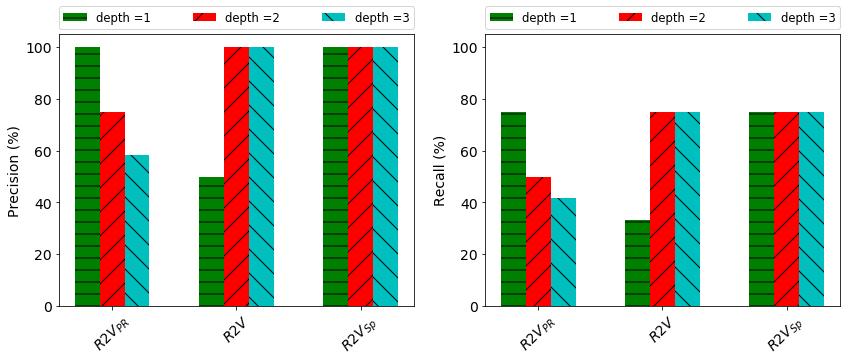

Plotting startrek
k@[9]


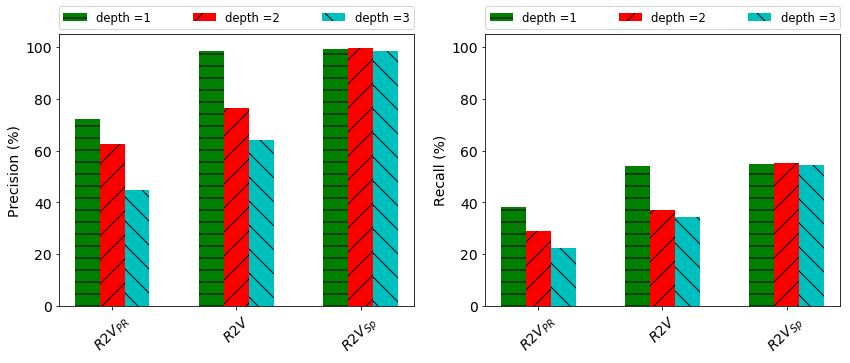

Plotting superman
k@[4]


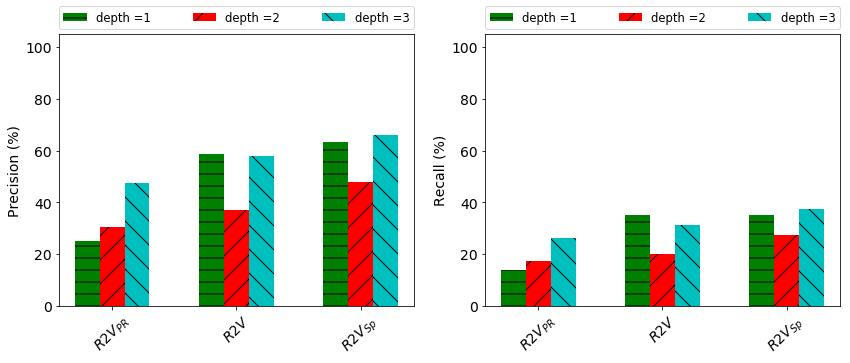

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

dirname = "./iswc/N10000/"
styles = ['b--', 'r--', 'g--', 'y--','c--','m--','k--','b-', 'r-', 'g-', 'y-','c-','m-','k-','b:', 'r:', 'g:', 'y:','c:','m:','k:']
markers = ['o', '^', 'v', 's','+','x','D','o', '^', 'v', 's','+','x','D','o', '^', 'v', 's','+','x','D']

depths2 = list([1,2,3])
plotWidth = 14
plotHeight = 5

barstyles = ['g', 'r', 'c', 'y']
patterns = ('-', '/', '\\', 'x', '\\', '*', 'o', 'O', '.')

cases = (7,9,10)#,11,13,15,17)
labelsX = [labels[i-1] for i in cases]

font = {'family' : 'sans-serif',
        'weight' : 'medium',
        'size'   : 14}
matplotlib.rc('font', **font)
    
#outputDir = dirname + 'results/'
#movies = ('batman', 'lotr', 'starwars', 'spiderman', 'startrek','indiana','bttf','harry','godzilla')

movies = ('batman', 'bttf', 'godzilla', 'harry', 'indiana'
          , 'lotr', 'starwars', 'spiderman', 'startrek','superman')
movieLabels = ('Batman', 'Back to the Future', 'Godfather', 'Godzilla', 'Harry Potter', 'Indiana Jones'
               , 'Lord of the Rings', 'Star Wars', 'Spiderman', 'Star Trek','Superman'
               ,'Back to the Future')

for i in np.arange(0,len(movies)):

    movie = movies[i]
    print('Plotting ' + movies[i])
    resultsFile = open(dirname + 'franchise/franchise_' + movie + '_20180511-1200_avg.txt', 'r')

    datalist = []

    for line in resultsFile:
        line = line.rstrip('\n')
        words = line.split('\t')
        scheme = words[0]
        currcase = int(scheme[scheme.index('case_')+5:scheme.index('_d')])
        k = int(words[1])
        precision = float(words[2])
        recall = float(words[3])
        if (precision == 0 and recall == 0):
            fscore = 0.0
        else:
            fscore = 2*(precision*recall)/(precision+recall)
        if currcase not in cases:
            continue
        datalist.append([scheme, currcase, k, precision, recall, fscore])

    sortedData = sorted(datalist, key=lambda result:result[1])

    kvals = np.sort(np.unique([s[2] for s in sortedData]))
    kvals = [np.max(kvals)]
    print('k@' + str(kvals))
    
    fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(plotWidth,plotHeight))
    
    for k in np.arange(0,len(kvals)):
        plt.subplot(1,2,1)#, figsize=(plotWidth,plotHeight))
        bar_width = 0.2
        opacity = 1.0
        idx = 0
        for depth in depths2:
            data = [s for s in sortedData if ("d_" + str(depth)) in s[0] and s[2] == kvals[k]]
            YP = [y[3] for y in data]
            intlabelcases = np.arange(1,len(cases)+1)
            plt.bar(-0.2 + intlabelcases + (depths2.index(depth))*bar_width, YP, bar_width,
                     alpha=opacity,
                     color=barstyles[depth-1], hatch=patterns[depth-1],
                     label="depth =" + str(depth))
            idx = idx + 1

    plt.ylim(0.0, 105.0)
    plt.ylabel('Precision (%)')
    plt.legend(loc = 3, bbox_to_anchor=(0., 1.02, 1., .102), fontsize = 'small',
               ncol=3, mode="expand", borderaxespad=0.)
    plt.xticks(intlabelcases, labelsX, rotation=45)
        #fig.tight_layout()
    #plt.savefig(outputDir + movie + '_' + str(kvals[k]) + '_precision.pdf', format='pdf', dpi=600, bbox_inches='tight')
    
    for k in np.arange(0,len(kvals)):    
        plt.subplot(1,2,2)
        bar_width = 0.2
        opacity = 1.0
        idx = 0
        for depth in depths2:
            data = [s for s in sortedData if ("d_" + str(depth)) in s[0] and s[2] == kvals[k]]
            YP = [y[4] for y in data]
            intlabelcases = np.arange(1,len(cases)+1)
            plt.bar(-0.2 + intlabelcases + (depths2.index(depth))*bar_width, YP, bar_width,
                     alpha=opacity,
                     color=barstyles[depth-1], hatch=patterns[depth-1],
                     label="depth =" + str(depth))
            idx = idx + 1

    plt.ylim(0.0, 105.0)
    plt.ylabel('Recall (%)')
    plt.legend(loc = 3, bbox_to_anchor=(0., 1.02, 1., .102), fontsize = 'small',
               ncol=3, mode="expand", borderaxespad=0.)
    plt.xticks(intlabelcases, labelsX, rotation=45)
        
    #fig.savefig(outputDir + movie + '_' + str(kvals[k]) + '_results.pdf', format='pdf', dpi=600, bbox_inches='tight')
    #fig.tight_layout()
    plt.show()
    #close(fig)
